In [3]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Ruindows\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Ruindows\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Ruindows\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [4]:
# Getting out data

train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [18]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


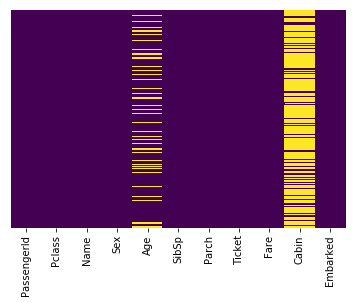

In [64]:
# Missing Data

sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

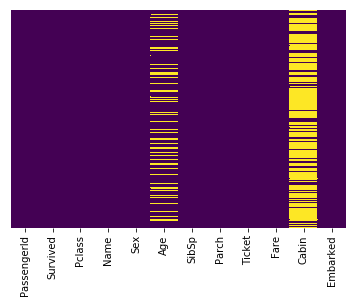

In [65]:
# Missing Data

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
# Data Cleaning

# Defining a fuction to fulfill the missing data in age column
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [6]:
# Applying to test and train data

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

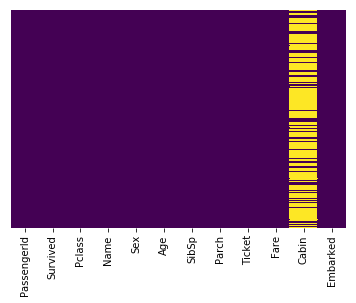

In [68]:
# New train Missing Data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

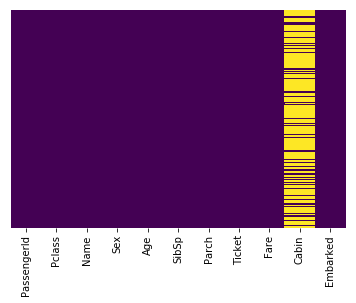

In [69]:
# New test Missing Data
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [70]:
test[test['Fare'].isna()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [7]:
# Cleaning Cabin column

train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [8]:
#Removing lines with Missing arguments 

test.dropna(inplace=True)
train.dropna(inplace=True)

In [9]:
## Converting Categorical Features and dropping unuseful args

sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)

In [10]:
## Converting Categorical Features and dropping unuseful args

sex2 = pd.get_dummies(test['Sex'],drop_first=True)
embark2 = pd.get_dummies(test['Embarked'],drop_first=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test = pd.concat([test,sex2,embark2],axis=1)

In [76]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [10]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


C:\Users\Ruindows\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ruindows\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ruindows\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


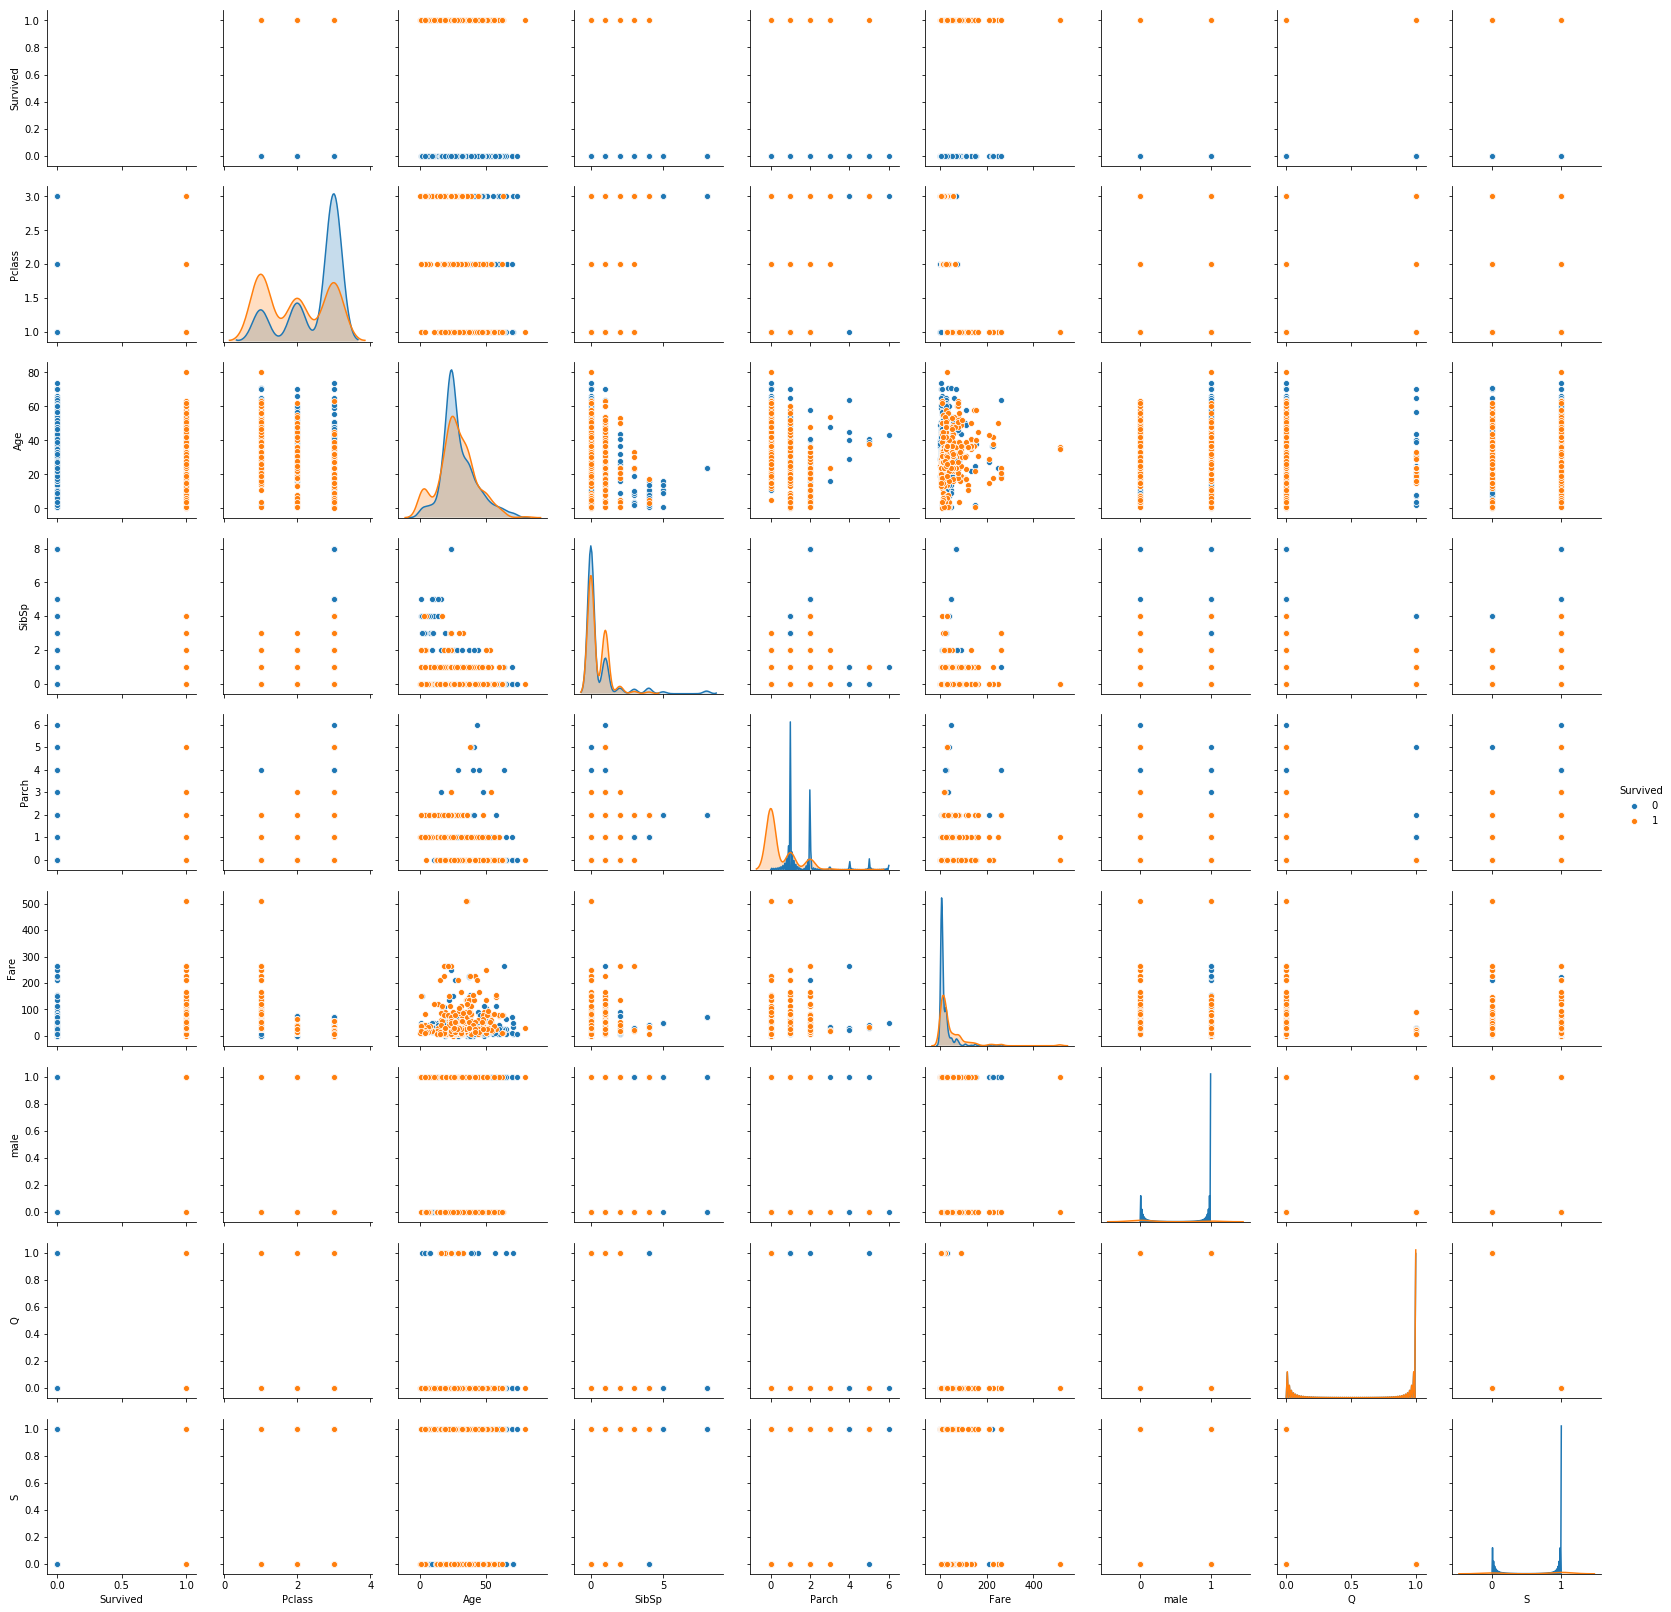

In [16]:
sns.pairplot(train.drop('PassengerId',axis=1),hue='Survived')

In [17]:
from sklearn.model_selection import train_test_split
X  = train.drop(['Survived','PassengerId'],axis=1)
y = train['Survived']
#X_test = test.drop(['PassengerId'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
#Training and Predicting

from sklearn.linear_model import LogisticRegression

C:\Users\Ruindows\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [18]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
predictions = logmodel.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  25]
 [ 32  78]]


             precision    recall  f1-score   support

          0       0.83      0.86      0.85       184
          1       0.76      0.71      0.73       110

avg / total       0.80      0.81      0.80       294



In [58]:
## Create a DF from predictions and columns to start at 892

In [82]:
df = pd.DataFrame(data=predictions,index=test['PassengerId'],columns=["Survived"])

In [83]:
df.to_csv('Predictions.csv')